<center> <img SRC="calentamiento.jpg" align="center"/> </center>

<center> <h1 style="color:#5DADE2"> Análisis de Temperatura Promedio de las mayores cuidades del mundo </h1> </center>

<center> <h2 style="color:#5DADE2"> Set de datos desde 1995 hasta el presente </h2> </center>

<center> <h3 style="color:#5DADE2"> Curso de Análisis de datos </h3> </center>

<p style="Text-align:justify"> El siguiente análisis se realiza con el fin de explorar la temperatura en diferentes cuidades del mundo a partir desde 1995, como parte del proyecto final;pero también al ser un tema de importante relevancia en los ultimos años y su efecto con el cambio climatico. </p>

<h2 style="color:#C70039  "> 1. Carga y estandarizacion de los archivos de datos </h2>
<p> Que hace este apartado? </p>
<ol>
    <li>Importar las liberias que se necesitan</li>
    <li>Importar los sets de datos de los CSV </li>
    <li>Revisar los encabezados de los Data Frames </li>
</ol>
<h3 style="color:#C70039 "> 1.1 Importacion de librerias </h3>

In [1]:
#Importacion de librerias necesarias para el analisis de datos 

import pandas as pd # El manejo de los marcos de datos (Dataframes)
import numpy as np # El manejo de estructuras de datos cmo listas,directorios,arrays
import matplotlib.pyplot as plt # Se utliza para crear graficas basadas en datos
import matplotlib as mplt # Se utiliza para crear graficas basadas en los datos.

<h3 style="color:#C70039 ">1.2. Carga de Datos

In [2]:
# Carga del set de datos
import pandas as pd

dfcity_temperature=pd.read_csv("city_temperature.csv", low_memory=False)

<h3 style="color:#C70039 ">1.3.Revisar los encabezados

In [3]:
dfcity_temperature

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [4]:
dfcity_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [5]:
dfcity_temperature.shape

(2906327, 8)

<h2 style="color:#C70039 "> 2. Manejo de Valores Faltantes o Perdidos </h2>
<p> Que hace este apartado? </p>
<ol>
    <li>Identificar como se muestran los valores faltantes y estandarizados (NaN)</li>
    <li>Contar los valores faltantes por variables </li>
    <li>Analisis de la imputacion de valores String con el dato mas frecuente</li>
    <li>Analisis de imputacion de valores con la media </li>
    <li>Analisis para eliminar valores faltantes</li>

<h3 Style="color:#C70039 "> 2.1 Identificacion de valores faltantes o perdidos y estandarizacion

In [6]:
dfcity_temperature

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


<h3 Style="color:#C70039 "> 2.2 Contar valores faltantes o perdidos por variable

In [7]:
valoresperdidos=dfcity_temperature.isnull()
valoresperdidos.head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
5,False,False,True,False,False,False,False,False
6,False,False,True,False,False,False,False,False
7,False,False,True,False,False,False,False,False
8,False,False,True,False,False,False,False,False
9,False,False,True,False,False,False,False,False


In [8]:
for column in valoresperdidos.columns.values.tolist():
    print(column)
    print(valoresperdidos[column].value_counts())
    print(" ")

Region
False    2906327
Name: Region, dtype: int64
 
Country
False    2906327
Name: Country, dtype: int64
 
State
False    1455337
True     1450990
Name: State, dtype: int64
 
City
False    2906327
Name: City, dtype: int64
 
Month
False    2906327
Name: Month, dtype: int64
 
Day
False    2906327
Name: Day, dtype: int64
 
Year
False    2906327
Name: Year, dtype: int64
 
AvgTemperature
False    2906327
Name: AvgTemperature, dtype: int64
 


<h3 Style="color:#C70039 "> 2.3.Imputar valores String con el mas frecuente </h3>

In [9]:
dfcity_temperature["State"].value_counts().idxmax()

'Texas'

In [10]:
dfcity_temperature["State"].replace(np.nan,"Texas",inplace=True)
dfcity_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Texas,Algiers,1,1,1995,64.2
1,Africa,Algeria,Texas,Algiers,1,2,1995,49.4
2,Africa,Algeria,Texas,Algiers,1,3,1995,48.8
3,Africa,Algeria,Texas,Algiers,1,4,1995,46.4
4,Africa,Algeria,Texas,Algiers,1,5,1995,47.9


In [11]:
valoresperdidos=dfcity_temperature.isnull()
for column in valoresperdidos.columns.values.tolist():
    print(column)
    print(valoresperdidos[column].value_counts())
    print(" ")


Region
False    2906327
Name: Region, dtype: int64
 
Country
False    2906327
Name: Country, dtype: int64
 
State
False    2906327
Name: State, dtype: int64
 
City
False    2906327
Name: City, dtype: int64
 
Month
False    2906327
Name: Month, dtype: int64
 
Day
False    2906327
Name: Day, dtype: int64
 
Year
False    2906327
Name: Year, dtype: int64
 
AvgTemperature
False    2906327
Name: AvgTemperature, dtype: int64
 


<h3 style="color:#C70039 ">2.3.Imputar valores numericos con la media</h3>

In [12]:
yearless=dfcity_temperature.loc[dfcity_temperature["Year"]<1000,"Region"] # Comprobacion de fechas menores al año mil
yearless.head()

58178    Africa
58179    Africa
58180    Africa
58181    Africa
58182    Africa
Name: Region, dtype: object

In [13]:
dfcity_temperature["Year"] = np.where(dfcity_temperature["Year"]< 1000, 2006, dfcity_temperature["Year"])#Reemplazar valores con la media

In [14]:
yearless=dfcity_temperature.loc[dfcity_temperature["Year"]<1000,"Region"] #Segunda revision de fechas
yearless.head()

Series([], Name: Region, dtype: object)

In [15]:
yearless=dfcity_temperature.loc[dfcity_temperature["Year"]>2021,"Region"] # Comporbacion de años mayores al 2021
yearless.head()

Series([], Name: Region, dtype: object)

In [16]:
yearless=dfcity_temperature.loc[dfcity_temperature["Month"]<0,"Region"] # Comporbacion de meses menores a 0
yearless.head()

Series([], Name: Region, dtype: object)

In [17]:
yearless=dfcity_temperature.loc[dfcity_temperature["Month"]>12,"Region"]# Comprobacion de meses mayores a 12
yearless.head()

Series([], Name: Region, dtype: object)

In [18]:
yearless=dfcity_temperature.loc[dfcity_temperature["Day"]<0,"Region"] #Comprobacion de dias menores a 0
yearless.head()

Series([], Name: Region, dtype: object)

In [19]:
yearless=dfcity_temperature.loc[dfcity_temperature["Day"]>31,"Region"]# Comprobacion de dias mayores 31
yearless.head()

Series([], Name: Region, dtype: object)

In [20]:
yearless=dfcity_temperature.loc[dfcity_temperature["AvgTemperature"]<-99,"AvgTemperature"] # Comprobacion de Temperatura menor a -99
yearless.head()

Series([], Name: AvgTemperature, dtype: float64)

In [21]:
avg_norm=dfcity_temperature["AvgTemperature"].astype("float").mean(axis=0)
print("La media de AvgTemperature es:", avg_norm)

La media de AvgTemperature es: 56.004920781458054


In [22]:
dfcity_temperature.replace(-99,56.00,inplace=True) # El set de datos nos indica que -99 son valores nulos

In [23]:
yearless=dfcity_temperature.loc[dfcity_temperature["AvgTemperature"]<-99,"AvgTemperature"] #Temperatura menor a -99. Revision
yearless.head()

Series([], Name: AvgTemperature, dtype: float64)

In [24]:
yearless=dfcity_temperature.loc[dfcity_temperature["AvgTemperature"]>200,"AvgTemperature"] #Comporbacion de Temperatura mayor a 200
yearless.head()

Series([], Name: AvgTemperature, dtype: float64)

<h3 style="color:#C70039 "> 3.Estandarizacion de los datos </h3>

<p> Que se hace en este apartado? </p>

<ol>
    <li> Se verifica el dominio de la variable y se ajusta si es necesario </li>
    <li> Se convierten los valores en funcion de su interpretaciom </li>
    <li> Se normalian los datos para que los valores distintos queden entre 0 y 1 </li>
    <li> Binning </li>
</ol>

<h3 style="color:#C70039 "> 3.Verificacion del dominio de variables </h3>

In [25]:
dfcity_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Texas,Algiers,1,1,1995,64.2
1,Africa,Algeria,Texas,Algiers,1,2,1995,49.4
2,Africa,Algeria,Texas,Algiers,1,3,1995,48.8
3,Africa,Algeria,Texas,Algiers,1,4,1995,46.4
4,Africa,Algeria,Texas,Algiers,1,5,1995,47.9


In [26]:
dfcity_temperature.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [27]:
dfcity_temperature[["AvgTemperature"]]=dfcity_temperature[["AvgTemperature"]].astype("float")

In [28]:
dfcity_temperature[["Month","Day","Year"]]=dfcity_temperature[["Month","Day","Year"]].astype("int")

In [29]:
dfcity_temperature.dtypes

Region             object
Country            object
State              object
City               object
Month               int32
Day                 int32
Year                int32
AvgTemperature    float64
dtype: object

<h3 style="color:#C70039 "> 3.2. Estandarizacion de los valores </h3>

In [30]:
dfcity_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Texas,Algiers,1,1,1995,64.2
1,Africa,Algeria,Texas,Algiers,1,2,1995,49.4
2,Africa,Algeria,Texas,Algiers,1,3,1995,48.8
3,Africa,Algeria,Texas,Algiers,1,4,1995,46.4
4,Africa,Algeria,Texas,Algiers,1,5,1995,47.9


In [31]:
dfcity_temperature["Gradoscelsius"]=(dfcity_temperature["AvgTemperature"]-32)*5/9 #En este caso se crea la columna de grados celsius

In [32]:
dfcity_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Gradoscelsius
0,Africa,Algeria,Texas,Algiers,1,1,1995,64.2,17.888889
1,Africa,Algeria,Texas,Algiers,1,2,1995,49.4,9.666667
2,Africa,Algeria,Texas,Algiers,1,3,1995,48.8,9.333333
3,Africa,Algeria,Texas,Algiers,1,4,1995,46.4,8.000000
4,Africa,Algeria,Texas,Algiers,1,5,1995,47.9,8.833333


<h3 style="color:#C70039 "> 3.3. Binning </h3>

In [33]:
gregion=dfcity_temperature.groupby(["Region"]).count()
gregion=gregion.iloc[:,7:8]
gregion["Gradoscelsius"].map(lambda x:format(x,','))

Region
Africa                                 251,118
Asia                                   316,663
Australia/South Pacific                 55,596
Europe                                 381,990
Middle East                            124,749
North America                        1,556,681
South/Central America & Carribean      219,530
Name: Gradoscelsius, dtype: object

<h3 style="color:#C70039 "> 4. Visualizacion de datos </h3>
<p> En este aparatdo se van crear diferentes graficos, los cuales nos ayudaran a realizar la interpretacion y analis de la informacion </p>

<ol>
    <li> Puntualmente se va a buscar respuestas a las preguntas de negocio que motivan el proyecto </li>
    <li> Disponer de conocimiento pleno del set de datos </li>
    <li> Experiencia del negocio </li>
</ol>

<h3 style="color:#C70039 ">Cual es la cantidad de muestras de temperaturas tomadas por Region? </h3>

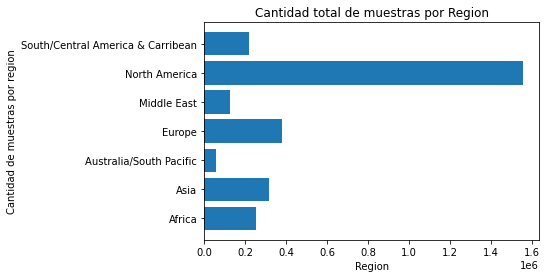

<Figure size 2160x3600 with 0 Axes>

In [34]:
eje_x=("Africa","Asia","Australia/South Pacific","Europe","Middle East","North America","South/Central America & Carribean")
eje_y=gregion["Gradoscelsius"].tolist()

#Creamos el grafico de barras
plt.barh(eje_x,eje_y)

# Colocamos etiqueta eje y
plt.ylabel("Cantidad de muestras por region")

# Colocamos etiqueta eje x
plt.xlabel("Region")

#Colocamos el tiutlo del grafico
plt.title("Cantidad total de muestras por Region")

plt.figure(figsize=[30, 50])


#Finalmente mostramos la grafica
plt.show()

<p> <big><i>De acuerdo al grafico anterior se observa que North America posee un total de <u> 1,556,681 </u> en contraste de Australia con<u> 55,596 </u> muestras</i> </big> </p> 

<h3 style="color:#C70039 "> Cual es la cuidad que presenta las temperaturas mas elevadas y la cuidad con las temperaturas mas bajas? </h3>

In [35]:
dfcity_temperature.max()

Region            South/Central America & Carribean
Country                                      Zambia
State                                       Wyoming
City                                         Zurich
Month                                            12
Day                                              31
Year                                           2020
AvgTemperature                                110.0
Gradoscelsius                             43.333333
dtype: object

In [36]:
dfcity_temperature.min()

Region                            Africa
Country                          Albania
State             Additional Territories
City                             Abidjan
Month                                  1
Day                                    0
Year                                1995
AvgTemperature                     -50.0
Gradoscelsius                 -45.555556
dtype: object

<p><big><i>Segun las tablas presentadas la mayor temperatura se presento en <b>Zambia</b> con <b>43 grados celsius</b> en el año <b>2020.</b>Y la ciudad de <b>Albania</b> presenta la temperatura mas baja con <b>-45 grados celsius</b> en el año <b>1995</b>. </big></i></p>

<h3 style="color:#C70039"> Cual es el promedio de temperaturas en grados celsius por año? </h3>

In [37]:
dfcity_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Gradoscelsius
0,Africa,Algeria,Texas,Algiers,1,1,1995,64.2,17.888889
1,Africa,Algeria,Texas,Algiers,1,2,1995,49.4,9.666667
2,Africa,Algeria,Texas,Algiers,1,3,1995,48.8,9.333333
3,Africa,Algeria,Texas,Algiers,1,4,1995,46.4,8.000000
4,Africa,Algeria,Texas,Algiers,1,5,1995,47.9,8.833333


In [38]:
yeartemp=dfcity_temperature.groupby("Year").mean()
yeartemp

,Month,Day,AvgTemperature,Gradoscelsius
Year,,,,
1995,6.526447,15.721648,59.235195,15.130664
1996,6.513615,15.756707,58.535030,14.741683
1997,6.527458,15.720621,58.982979,14.990544
1998,6.529484,15.720638,60.544059,15.857810
1999,6.526027,15.720548,60.111983,15.617768
2000,6.513661,15.756831,59.528635,15.293686
2001,6.526027,15.720548,60.178464,15.654702
2002,6.526027,15.720548,60.051686,15.584270
2003,6.519011,15.720295,59.835358,15.464088


In [39]:
yeartemp.max()

Month              6.541973
Day               15.756831
AvgTemperature    61.986534
Gradoscelsius     16.659186
dtype: float64

In [40]:
yeartemp.min()

Month              2.736099
Day               14.800077
AvgTemperature    54.047148
Gradoscelsius     12.248415
dtype: float64

In [41]:
yeartemp.mean()

Month              6.374079
Day               15.693465
AvgTemperature    60.119737
Gradoscelsius     15.622076
dtype: float64

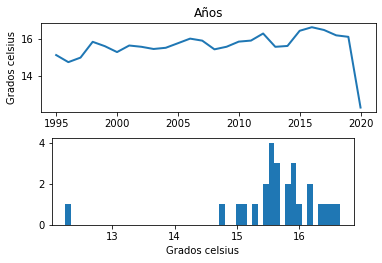

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(211)
ax1.set_ylabel('Grados celsius')
ax1.set_title('Años')

t= [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,
        2014,2015,2016,2017,2018,2019,2020]

s= yeartemp["Gradoscelsius"].tolist() 

line, = ax1.plot(t, s, lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(yeartemp["Gradoscelsius"].tolist(), 50)
ax2.set_xlabel('Grados celsius')

plt.show()

<p><big><i>Según la información anterior el promedio de temperartura en grados celsius por año es de<u> 15.62</u>. La temperatura maxima registrada fue en el año <u>2016</u> con <u>16.65</u> grados celsius y la menor temperatura fue en el año <u>2020</u> con<u> 12.24 </u> grados celsius en promedio </i></big></p>

<h3 style="color:#C70039"> Cuales paises presentan temperaturas mayores a 40 grados celsius? </h3>

In [43]:
mayor40=dfcity_temperature.loc[dfcity_temperature.Gradoscelsius>40,["Country","Gradoscelsius"]]
mayor40

,Country,Gradoscelsius
1028709,Kuwait,40.333333
1028710,Kuwait,41.166667
1028711,Kuwait,40.277778
1028724,Kuwait,41.000000
1028751,Kuwait,40.222222
...,...,...
2230559,US,40.333333
2230560,US,40.833333
2233464,US,40.500000
2234550,US,41.666667


In [44]:
grupo40=mayor40.groupby(dfcity_temperature["Country"]).mean()
grupo40.sort_values(by='Gradoscelsius', ascending=False)

,Gradoscelsius
Country,
Kuwait,41.051493
Qatar,40.733135
Saudi Arabia,40.702899
United Arab Emirates,40.702257
US,40.615556
Oman,40.601852


<p><i><big> De acuerdo a la data anterior, los paises con temperaturas mayores de 40 grados celsius son: Kuwait,Qatar,Saudi Arabia,United Arab Emirates,US,Oman. </i></big></p>

<h3 style="color:#C70039"> Cuales paises presentan temperaturas menores a 40 grados celsius? </h3>

In [45]:
menor40=dfcity_temperature.loc[dfcity_temperature["Gradoscelsius"]<-40,["Country","Gradoscelsius"]]
menor40.head()

,Country,Gradoscelsius
1497341,US,-40.888889
1497691,US,-40.944444
1498047,US,-40.944444
1498048,US,-41.833333
1498050,US,-43.444444


In [46]:
grupo_40=menor40.groupby(dfcity_temperature["Country"]).mean()
grupo_40

,Gradoscelsius
Country,
US,-41.732426


<p><i><big> Con la informacion anterior se determina que <b>US</b> es el unico pais con temperaturas inferiores a los 40 grados celsius</i></big></p>

<h3 style="color:#C70039"> Cuales estados presentan temperaturas mayores a 40 grados celsius? </h3>

In [47]:
estado40=dfcity_temperature.loc[dfcity_temperature["Gradoscelsius"]>40,["State","Gradoscelsius"]]
estado40.sort_values(by='Gradoscelsius', ascending=False)

,State,Gradoscelsius
1034962,Texas,43.333333
1036042,Texas,43.277778
1032390,Texas,43.277778
1036756,Texas,43.277778
1034963,Texas,43.277778
...,...,...
1036778,Texas,40.055556
1031263,Texas,40.055556
1031261,Texas,40.055556
1036794,Texas,40.055556


In [48]:
grupo5=estado40.groupby(dfcity_temperature["State"]).mean()
grupo5.sort_values(by='Gradoscelsius', ascending=False)

,Gradoscelsius
State,
Texas,40.982436
Nevada,40.657407
Arizona,40.602339


<p><i><big> Los estados que presentan temperaturas mayores a 40 grados celsius son <b>Texas,Nevada y Arizona.</b> </i></big></p>

<h3 style="color:#C70039"> Cuales estados presentan temperaturas menores a 40 grados celsius? </h3>

In [49]:
estado_40=dfcity_temperature.loc[dfcity_temperature["Gradoscelsius"]<-40,["State","Gradoscelsius"]]
estado_40.head()

,State,Gradoscelsius
1497341,Alaska,-40.888889
1497691,Alaska,-40.944444
1498047,Alaska,-40.944444
1498048,Alaska,-41.833333
1498050,Alaska,-43.444444


In [50]:
grupo6=estado_40.groupby(dfcity_temperature["State"]).mean()
grupo6

,Gradoscelsius
State,
Alaska,-41.732426


<P><i><big>El unico estado que presenta temperaturas inferiores a 40 grados celsius es <b>Alaska.</b> </i></big></p>

<h3 style="color:#C70039"> En el set de datos, existe informacion de Costa Rica? </h3>

In [51]:
costarica=dfcity_temperature[dfcity_temperature['Country'].str.contains('Costa Rica') == True]
costarica

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Gradoscelsius
1319838,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,1,1995,72.9,22.722222
1319839,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,2,1995,72.0,22.222222
1319840,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,3,1995,74.3,23.500000
1319841,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,4,1995,71.5,21.944444
1319842,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,5,1995,72.8,22.666667
...,...,...,...,...,...,...,...,...,...
1329099,South/Central America & Carribean,Costa Rica,Texas,San Jose,5,9,2020,75.8,24.333333
1329100,South/Central America & Carribean,Costa Rica,Texas,San Jose,5,10,2020,75.6,24.222222
1329101,South/Central America & Carribean,Costa Rica,Texas,San Jose,5,11,2020,75.8,24.333333
1329102,South/Central America & Carribean,Costa Rica,Texas,San Jose,5,12,2020,77.4,25.222222


<p><i><big> Realizando un filtro del set de datos,se encuentra registros de tempeartura de Costa Rica</i></big></p>

<h3 style="color:#C70039"> Cual es la temperatura promedio de Costa Rica por año? </h3>

In [52]:
costarica1=costarica.groupby(dfcity_temperature["Year"]).mean()
costarica1

,Month,Day,Year,AvgTemperature,Gradoscelsius
Year,,,,,
1995,6.526027,15.720548,1995.0,70.177808,21.209893
1996,6.513661,15.756831,1996.0,71.605464,22.003036
1997,6.526027,15.720548,1997.0,73.195890,22.886606
1998,6.526027,15.720548,1998.0,73.507397,23.059665
1999,6.526027,15.720548,1999.0,71.444658,21.913699
2000,6.513661,15.756831,2000.0,72.097268,22.276260
2001,6.526027,15.720548,2001.0,73.195068,22.886149
2002,6.526027,15.720548,2002.0,73.807123,23.226180
2003,6.526027,15.720548,2003.0,73.393973,22.996651


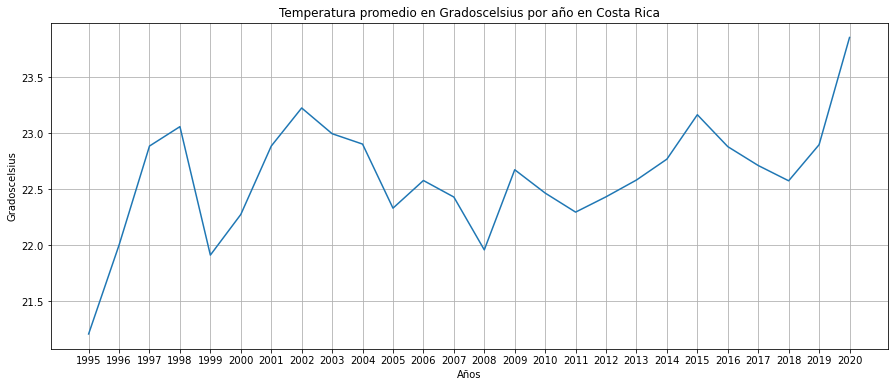

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

x = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,
        2014,2015,2016,2017,2018,2019,2020]

y = costarica1["Gradoscelsius"].tolist()

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='Años', ylabel='Gradoscelsius',
       title='Temperatura promedio en Gradoscelsius por año en Costa Rica')
ax.grid()

plt.xticks (x) # Sirve para colocar todos los valores del eje x
fig.set_figheight(6) # Sirve para cambiar el alto de la figura
fig.set_figwidth(15) # Sirve para cambiar el ancho de la figura

fig.savefig("test.png")
plt.show()

In [54]:
maximo=costarica1.max()
maximo

Month                6.540984
Day                 15.759563
Year              2020.000000
AvgTemperature      74.939552
Gradoscelsius       23.855307
dtype: float64

In [55]:
minimo=costarica1.min()
minimo

Month                2.738806
Day                 14.798507
Year              1995.000000
AvgTemperature      70.177808
Gradoscelsius       21.209893
dtype: float64

In [56]:
costarica1.mean()

Month                6.378087
Day                 15.694958
Year              2007.500000
AvgTemperature      72.706513
Gradoscelsius       22.614730
dtype: float64

<P><i><big> Con la informacion anterior se determina que la temperatura <u> minima </u> en CR se presento en el año <b>1995</b> con <b>21.20 grados celsius</b>, la <u>mayor</u> temperatura registrada fue en el año <b>2020</b> con <b> 23.85 grados celsius</b>.Y la temperatura <u> promedio </u> del pais es de <b>22.61 grados celsius</b>. </i></big></p>

<h3 style="color:#C70039"> Existe un aumento en la temperatura en CR en los ultimos años? </h3>

In [57]:
diferenciaporcentual=maximo["Gradoscelsius"]-minimo["Gradoscelsius"]
diferenciaporcentual

2.645413344237742

<p><i><big> Si, comparando la temperatura del año 1995 y la temperatura del año 2020, se observa un aumento de <b>2.6</b> grados celsius en la temperatura del pais.</i></big></p>

<h3 style="color:#C70039"> Cual ha sido el mes de mayor temperatura en Costa Rica ? </h3>

In [59]:
costarica.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Gradoscelsius
1319838,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,1,1995,72.9,22.722222
1319839,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,2,1995,72.0,22.222222
1319840,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,3,1995,74.3,23.500000
1319841,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,4,1995,71.5,21.944444
1319842,South/Central America & Carribean,Costa Rica,Texas,San Jose,1,5,1995,72.8,22.666667


In [76]:
year=pd.cut(costarica["Year"],[1995,2000,2010,2020])
mes=costarica.pivot_table("Gradoscelsius",[year],"Month")
mes

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
"(1995, 2000]",22.245520,22.929969,23.239427,23.706667,22.445161,22.355926,22.709319,22.485663,21.572963,21.693548,21.700741,22.075627
"(2000, 2010]",22.728136,23.067967,23.537814,23.865926,22.943728,22.463704,22.638889,22.447670,21.925556,21.804301,21.929259,22.421685
"(2010, 2020]",22.714337,23.063801,23.526523,23.741852,22.900685,22.813374,22.913779,22.643170,22.102058,21.702509,22.036008,22.600595


In [87]:
mesmaximo=mes.max(axis = 0)
mesmaximo

Month
1     22.728136
2     23.067967
3     23.537814
4     23.865926
5     22.943728
6     22.813374
7     22.913779
8     22.643170
9     22.102058
10    21.804301
11    22.036008
12    22.600595
dtype: float64

In [96]:
mesmaximo.max()

23.86592592592592

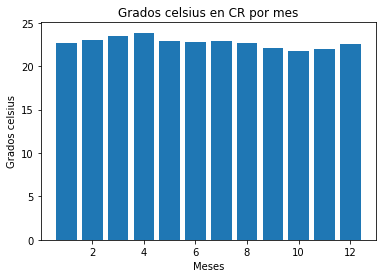

<Figure size 720x1080 with 0 Axes>

In [117]:
import matplotlib.pyplot as plt

eje_x = (1,2,3,4,5,6,7,8,9,10,11,12)
eje_y = mes.max(axis = 0)

#Creamos el grafico de barras
plt.bar(eje_x, eje_y)

#Colocamos una etiqueta en el eje Y
plt.ylabel("Grados celsius")
#Colocamos una etiqueta en el eje X
plt.xlabel("Meses")
#Colocamos el titulo del grafico
plt.title('Grados celsius en CR por mes')

#definir tamano del grafico
plt.figure(figsize=(10,15))

#Finalmente mostramos la grafica con el metodo show()
plt.show()

<p><i><big> El mes de mayor temperatura registrada en Costa Rica fue en el mes de abril con 23.86 grados celsius.</i></big></p>

<h3 style="color:#C70039"> Cual es la relacion entre grados celsius y fahrenheit en Costa Rica ? </h3>

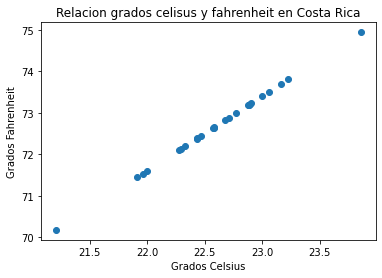

In [58]:
import numpy as np
import matplotlib.pyplot as plt


X =[1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,
        2014,2015,2016,2017,2018,2019,2020]

xs = costarica1["Gradoscelsius"].tolist()
ys = costarica1["AvgTemperature"].tolist()

fig, ax = plt.subplots()
ax.set_title('Relacion grados celisus y fahrenheit en Costa Rica')
ax.set(xlabel='Grados Celsius', ylabel='Grados Fahrenheit')
       
line, = ax.plot(xs, ys, 'o', picker=True, pickradius=5)


def onpick(event):

    if event.artist != line:
        return True

    N = len(event.ind)
    if not N:
        return True

    figi, axs = plt.subplots(N, squeeze=False)
    for ax, dataind in zip(axs.flat, event.ind):
        ax.plot(X[dataind])
        ax.text(.05, .9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

<p><i><big> La relacion de grados Fahrenheit y grados Celisus, radica en que mayor son los grados Farenheit, mayores serán los grados Celisus.A mayor grados en el eje y, la temperatura será más elevada, es decir, más caliente. Y conforme desciende los grados en el eje, más baja sera la temperatura, es decir más frio.</i></big></p>